<a href="https://colab.research.google.com/github/mukamal/topic-modeling-and-clustering/blob/main/topic_modeling_and_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploring Faculty Reseach using Text Mining

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

df = pd.read_csv('iSchoolpubdata_Experts_v5.csv')
names=df['Name'].tolist()
txts=df['TitlesAndAbstracts'].tolist()


df.head()

,Name,TitlesAndAbstracts
0,Bei Yu,Topic modeling for evaluating students' reflec...
1,Beth Patin,Struggling to breathe -- Purpose: The purpose ...
2,Bruce Kingma,University-wide entrepreneurship education -- ...
3,Bryan C Semaan,“I am uncomfortable sharing what I can't see” ...
4,Carlos Enrique Caicedo Bastidas,An initial approach towards quality of service...


In [ ]:
unigram_count = CountVectorizer(encoding='latin-1', stop_words='english', binary=False)
vecs = unigram_count.fit_transform(df['TitlesAndAbstracts'])

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity

cos_sim = cosine_similarity(vecs[0], vecs)
print(cos_sim)

sim_sorted_doc_idx = cos_sim.argsort()
print(sim_sorted_doc_idx.shape)

[[1.         0.12875761 0.11949674 0.41279035 0.18076245 0.36080546
  0.40004143 0.310771   0.33445665 0.24337534 0.42397761 0.33251484
  0.27761228 0.4123742  0.31727379 0.25755574 0.32267848 0.40627897
  0.06675091 0.1753439  0.46094295 0.34538754 0.30544257 0.14397987
  0.3066641  0.21042433 0.44148825 0.25748061 0.24049681 0.35811224]]
(1, 30)


In [ ]:
d={}

for i in range(len(names)):
    cos_sim = cosine_similarity(vecs[i], vecs)
    sim_sorted_doc_idx = cos_sim.argsort()
    a=[]
    b=[]
    c=[]
    for j in range(5):
        a.append(names[sim_sorted_doc_idx[0][len(txts)-j-2]])
        b.append(sim_sorted_doc_idx[0][len(txts)-j-2])
        c.append(float('%.2f'%(cos_sim[0][sim_sorted_doc_idx[0][len(txts)-j-2]])))
    d [names[i]]=[a,b,c]
#    print(d [names[i]])
d_df = pd.DataFrame(data=d)  

In [ ]:
d_df.to_csv(r'd_df.csv', index = False)


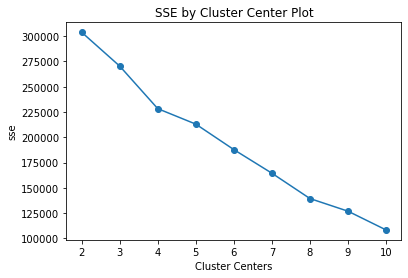

In [ ]:
from sklearn.cluster import KMeans

# elbow method to find the best number of K
import matplotlib.pyplot as plt
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 1)
    
    sse = []
    for k in iters:
        kmeans_model = KMeans(n_clusters=k,random_state=0, n_init=5).fit(data)
        sse.append(kmeans_model.inertia_)
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('sse')
    ax.set_title('SSE by Cluster Center Plot')


find_optimal_clusters(vecs,10)

In [ ]:
k = 4
km = KMeans(n_clusters=k, algorithm='auto', init='random', n_init=50, random_state=0, verbose=False)
kFit=km.fit(vecs)


In [ ]:
data_tuples = list(zip(names,km.labels_))
names_cluster=pd.DataFrame(data_tuples, columns=['Names','Cluster'])
names_cluster_sorted=names_cluster.sort_values(by=['Cluster'])
names_cluster_sorted.to_csv(r'clusters.csv', index = False)

names_cluster_sorted


,Names,Cluster
17,Kevin G Crowston,0
0,Bei Yu,1
26,Ping Zhang,1
20,Lu Xiao,1
10,Jeffrey Hemsley,1
29,Steven B Sawyer,1
3,Bryan C Semaan,1
27,Rachel Clarke,2
1,Beth Patin,2
25,Murali Venkatesh,2


In [ ]:
print(txts[12]) # Saltz

Modular design of data-driven analytics models in smart-product development -- Data-driven analytics models have been built as critical components of a smart product to enable product autonomy and intelligence. Due in part to the dynamic nature of the machinelearning algorithms used in data-driven analytics models, the configuration of a smart product is frequently refined, often in a real-time context. Hence, a smart product requires a continuous evolution of its architecture. This paper proposes a systematic method to facilitate the modularization of an analytics model architecture, so that a modular smart-product architecture can be achieved. Productizing an analytics model transforms conventional taskoriented data analytics activities into a data product development process. Issues related to the standardization of analytics models, the modular design approaches, the modularity quantification, and their impacts on the overall smart product design, are discussed. The proposed method

In [ ]:
print(txts[14]) #Qin

Transforming the data landscape -- This panel examines the state of research in the areas of data practices, behaviors, infrastructure, and policies through a series of five recently completed and in-progress studies. At their core these investigations seek to examine strategies for better connecting data, policies, and research communities. Often data and their related practices, policies, and infrastructure lack connection and cohesiveness to support data sharing among various communities. To better understand the current situation these connections will be explored through an assessment of emerging research. It is hoped that this research can be utilized to transform and better connect data practices, policies, and communities of practice.; A content analysis of institutional data policies -- The newly issued requirement for a data management plan in proposals submitted to the U.S. National Science Foundation and other federal funding agencies prompted many institutions to develop t

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000

#set ngram range include unigrams and bigrams

#tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features,ngram_range=(1,2),stop_words='english')
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features,stop_words='english')

tf = tf_vectorizer.fit_transform(txts)
tf_feature_names = tf_vectorizer.get_feature_names()





In [ ]:

from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 4

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
lda_z = lda.fit_transform(tf)


def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20


topics=display_topics(lda, tf_feature_names, no_top_words)


#Some topics do make sense by taking a look at some top keywords. For example, topic 6 is talking about cars. However some topics are unclear like topic 0 and 9.


Topic 0:
security library learning value research data libraries academic assessment based cloud users services social approach access literacy systems results user
Topic 1:
social media research online use data study design based analysis political different paper users approach messages public commerce work communication
Topic 2:
data research science social work design use paper learning knowledge study online support project analysis new projects metadata model using
Topic 3:
spectrum use learning data management value research firms using based systems dynamic wireless communication paper model access results analysis smart
